In [5]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv("data/CHD.csv", header=0) 
print(df.describe())

              age        chd
count  100.000000  100.00000
mean    44.380000    0.43000
std     11.721327    0.49757
min     20.000000    0.00000
25%     34.750000    0.00000
50%     44.000000    0.00000
75%     55.000000    1.00000
max     69.000000    1.00000


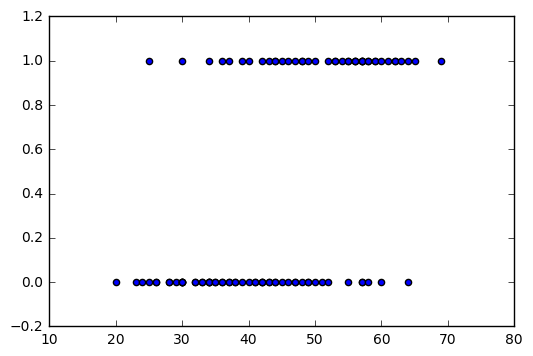

In [7]:
plt.figure() # Create a new figure 
plt.scatter(df['age'],df['chd']) #Plot a scatter draw of the random datapoints 

In [11]:
import tensorflow as tf

learning_rate = 0.2 
training_epochs = 5 
batch_size = 100 
display_step = 1 

b=np.zeros((100,2)) 
 
# tf Graph Input 
 
x = tf.placeholder("float", [None, 1]) 
y = tf.placeholder("float", [None, 2]) 
 
# Create model 
# Set model weights 
W = tf.Variable(tf.zeros([1, 2])) 
b = tf.Variable(tf.zeros([2])) 
 
# Construct model 
activation = tf.nn.softmax(tf.matmul(x, W) + b)

Epoch: 00001 cost=  0.638730764389
[ 0.04824295 -0.04824295]
[[-0.17459483  0.17459483]]
Epoch: 00002 cost=  0.589489638805
[ 0.08091066 -0.08091066]
[[-0.29231569  0.29231566]]
Epoch: 00003 cost=  0.565953567624
[ 0.10427245 -0.10427245]
[[-0.37499282  0.37499279]]
Epoch: 00004 cost=  0.553756475449
[ 0.12176144 -0.12176143]
[[-0.43521613  0.4352161 ]]
Epoch: 00005 cost=  0.54701936245
[ 0.13527818 -0.13527818]
[[-0.48031801  0.48031798]]


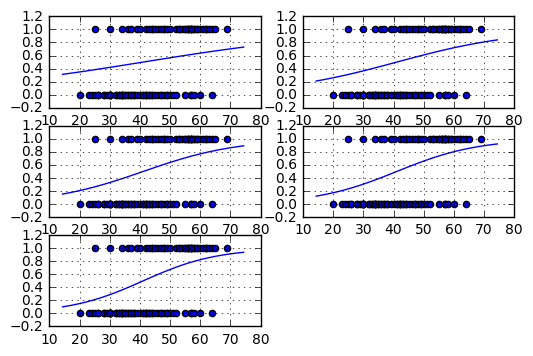

In [18]:

cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices=1)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 


# Initializing the variables 
init = tf.initialize_all_variables() 
 
# Launch the graph 
 
with tf.Session() as sess: 
    tf.train.write_graph(sess.graph, './graph','graph.pbtxt') 
    sess.run(init) 
    writer = tf.train.SummaryWriter('./graph', sess.graph) 
    #Initialize the graph structure 
 
    graphnumber=321 
 
    #Generate a new graph 
    plt.figure(1) 
 
    #Iterate through all the epochs 
    for epoch in range(training_epochs): 
        avg_cost = 0. 
        total_batch = 400/float(batch_size)
        # Loop over all batches 
 
        for i in range(int(total_batch)): 
            # Transform the array into a one hot format 
 
            temp=tf.one_hot(indices = df['chd'].values, depth=2, on_value = 1, off_value = 0, axis = -1 , name = "a")       
            batch_xs, batch_ys = (np.transpose([df['age']])-44.38)/11.721327, temp 
 
            # Fit training using batch data 
            sess.run(optimizer, feed_dict={x: batch_xs.astype(float), y: batch_ys.eval()}) 
 
            # Compute average loss, suming the corrent cost divided by the batch total number 
            avg_cost += sess.run(cost, feed_dict={x: batch_xs.astype(float), y: batch_ys.eval()})/total_batch 
        # Display logs per epoch step 
 
        if epoch % display_step == 0: 
            print("Epoch:", '%05d' % (epoch+1), "cost= ", avg_cost)
 
            #Generate a new graph, and add it to the complete graph 
 
            trX = np.linspace(-30, 30, 100) 
            print (b.eval()) 
            print (W.eval()) 
            Wdos=2*W.eval()[0][0]/11.721327 
            bdos=2*b.eval()[0] 
 
            # Generate the probabiliy function 
            trY = np.exp(-(Wdos*trX)+bdos)/(1+np.exp(-(Wdos*trX)+bdos) ) 
 
            # Draw the samples and the probability function, whithout the normalization 
            plt.subplot(graphnumber) 
            graphnumber=graphnumber+1 
 
            #Plot a scatter draw of the random datapoints 
            plt.scatter((df['age']),df['chd']) 
            plt.plot(trX+44.38,trY) #Plot a scatter draw of the random datapoints 
            plt.grid(True) 
 
        #Plot the final graph 
        plt.savefig("test.svg")  

